# CONCLUSION AND COMMENTS NOT YET COMPLETE!

## Data Cleaning and merging dataframes

In this notebook, we'll work with `movie_basics` and `movie_ratings` tables from `'im.db'`. As well as `'tn.movie_budget.csv'`.

Before we can get going, we'll need to import the relevant packages and conncet to the database.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import sqlite3
conn = sqlite3.connect('im.db')

In this notebook we'll focus on the `movie_basics` and `movie_ratings`.

## Compared to the Individual Tables:

### `movie_basics` Table:

In [2]:
q = """
SELECT *
FROM movie_basics
"""
pd.read_sql(q, conn).head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### `movie_ratings` Table:

In [3]:
q = """
SELECT *
FROM movie_ratings
"""
pd.read_sql(q, conn).head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Displaying movie_basics Along with movie_ratings

Since we need to generate a table that includes details about ` movie_basics`  and ` movie_ratings`, we would need to take data from multiple tables in a single statement using a concise way to join the tables, the `USING` clause. Which in this case is `movie_id`. Again, this only works if the column is **identically named** for both tables.

Then we assign the result of the querry to a variable names `df`, which is a dataframe. 

In [4]:
q = """
SELECT
    movie_id, 
    primary_title,
    genres,
    averagerating,
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
"""
df = pd.read_sql(q, conn)

To get a concise summary of the dataframe, you can use `.info()`: 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


## Nan (Not a Number):
When working with datasets, it is common to have missing or `NaN (Not a Number)` values. In order to understand the extent of missing data in a dataset, you can use the `.isna()` method to identify where the `NaN` values are located. Taking the `.sum()` of the `.isna(`) method will return the total number of NaN values in the dataset broken down by column.

In [6]:
df.isna().sum()

movie_id           0
primary_title      0
genres           804
averagerating      0
numvotes           0
dtype: int64

Since the `'genre'` is a categorical data and the missing values accounts for only 1 % of our data we decided to drop the rows that contained null values using the built-in function `.dropna()`. Since we are creating a new df, a new name will be given to it as `df_nonull_genres`.

In [7]:
df_nonull_genres = df.dropna(axis = 0)

Lets print the shape of our new df. Next, display the total number of `NaN` values in the dataset broken down by column.

In [8]:
df_nonull_genres.shape

(73052, 5)

In [9]:
df_nonull_genres.isna().sum()

movie_id         0
primary_title    0
genres           0
averagerating    0
numvotes         0
dtype: int64

Since, we dont have any other missing data to deal with, lets focus on finding duplicate movie titles using `.dulpicated()` and `.value_counts()`. Lets display the total amount of dulpicated rows. Subsequently, break it down by frequency for each movie title. 

In [10]:
df_nonull_genres['primary_title'].duplicated().value_counts()

False    69248
True      3804
Name: primary_title, dtype: int64

In [11]:
df_nonull_genres[df_nonull_genres['primary_title'].duplicated()]['primary_title'].value_counts()

The Return           10
Broken                9
Lucky                 8
Homecoming            8
Together              8
                     ..
Checkmate             1
Won't Back Down       1
Political Animals     1
Dead Awake            1
Drømmeland            1
Name: primary_title, Length: 2705, dtype: int64

The df shows 69248 `non-duplicated` values. A common practice would be to handle them properly but for  scope purposes of our study, which means we are time-limited,  lets just keep them in mind. Then, lets take a look on the second dataframe.

The second `df` can be found on `'tn.movie_budget.csv'`. Now, let's get started by reading in the data  and storing it the DataFrame `movie_budget`. Afterwárds, lets preview the data.

In [12]:
movie_budget = pd.read_csv('tn.movie_budgets.csv')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


`production_budget`, `domestic_gross`, and `worldwide_gross` are strings, so we will remove the commas and dollar signs

In [13]:
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '').str.replace(',', '')
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '').str.replace(',', '')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '')

C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_21700\3322509581.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '').str.replace(',', '')
C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_21700\3322509581.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '').str.replace(',', '')
C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_21700\3322509581.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions

`production_budget`, `domestic_gross`, and `worldwide_gross` are still strings, so we will change them to integers to be able to perform calculations with those columns

In [14]:
movie_budget['production_budget'] = movie_budget['production_budget'].astype('int64')
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].astype('int64')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].astype('int64')

A concise summary will be provided using `.info()`.

In [15]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


The above summary contains also the amount of null values brake down by columns. Since we don´t have missing data to deal with, we can move into merging `movie_budget`df and `df_nonull_genres` df. 

For doing so, lets print a short preview for both Dataframes. Focus on the column names.

In [16]:
df_nonull_genres.head(2)

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43


`movie_budget` df:

In [17]:
movie_budget.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


As you can see, the column which displays the movie title is different in both Dataframes. `df_nonull_genres` uses `'primary_title'`while `movie_budget` uses `'movie'`. 

We need to set them equal to use the column name as a key for merging both Dataframes into one. Will set both columns names as `'movie'`. In this case,  `df_nonull_genres` is the one selected to change its column name. 

In [18]:
df_nonull_genres.rename(columns={'primary_title' : 'movie'}, inplace = True)

C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_21700\3490391291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull_genres.rename(columns={'primary_title' : 'movie'}, inplace = True)


Lets view the column labels of the DataFrame `df_nonull_genres`.

In [19]:
df_nonull_genres.columns

Index(['movie_id', 'movie', 'genres', 'averagerating', 'numvotes'], dtype='object')

As you see, now the column name was changed succesfully. 

## Nan (Not a Number):

The following line of code is performing a merge operation between  `df_nonull_genre`s and `movie_budget`.

The merge is performed based on a common column called `'movie'`, specified by the `on` parameter.

The type of merge used is specified by the how parameter, which in this case is set to `'left'`, meaning that all the rows from the `df_nonull_genres dataframe` will be kept and any matching rows from the `movie_budget` dataframe will be included. Any non-matching rows from the movie_budget dataframe will have null values in the resulting dataframe.

Finally, a new column called `'im_and_movie_budget'` is added to the resulting merged dataframe, indicating whether a row is present in both dataframes (i.e., 'both'), only in the left dataframe (i.e., 'left_only'), or only in the right dataframe (i.e., 'right_only'). This is specified by the `indicator` parameter.

The resulting dataframe is assigned to the variable `im_movie_budget`. Subsequently, we use `value_counts()` to return a new Series object with the count of unique values of the new column called `'im_and_movie_budget'`.

In [20]:
im_movie_budget = pd.merge(df_nonull_genres ,movie_budget, on='movie', how='left', indicator = 'im_and_movie_budget')
im_movie_budget['im_and_movie_budget'].value_counts()

left_only     70307
both           2867
right_only        0
Name: im_and_movie_budget, dtype: int64

A sample was taken from Dataframe `im_movie_budget` by selecting rows that has a string value equal to `both`on column `'im_and_movie_budget'`. That sample name is `cleaned_df`.

In [21]:
cleaned_df = im_movie_budget[im_movie_budget['im_and_movie_budget'] == 'both'] 
cleaned_df.head(4)

,movie_id,movie,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,im_and_movie_budget
16,tt0249516,Foodfight!,"Action,Animation,Comedy",1.9,8248,26.0,31-Dec-12,45000000.0,0.0,73706.0,both
36,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,17.0,22-Mar-13,25000000.0,720828.0,9313302.0,both
42,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,37.0,25-Dec-13,91000000.0,58236838.0,187861183.0,both
46,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,67.0,19-Sep-14,28000000.0,26017685.0,62108587.0,both


Lets get a concise summary of the dataframe using `.info()`: 

In [22]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 16 to 73164
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movie_id             2867 non-null   object  
 1   movie                2867 non-null   object  
 2   genres               2867 non-null   object  
 3   averagerating        2867 non-null   float64 
 4   numvotes             2867 non-null   int64   
 5   id                   2867 non-null   float64 
 6   release_date         2867 non-null   object  
 7   production_budget    2867 non-null   float64 
 8   domestic_gross       2867 non-null   float64 
 9   worldwide_gross      2867 non-null   float64 
 10  im_and_movie_budget  2867 non-null   category
dtypes: category(1), float64(5), int64(1), object(4)
memory usage: 249.3+ KB


floats data types
it's possible for columns with integer data types to be converted to floating point data types. This can happen if one of the dataframes has null or missing values in the column being merged.

To avoid this type conversion, you can either fill in the missing values before merging the dataframes or use the astype method to convert the column back to an integer after the merge.

In [23]:
cleaned_df['production_budget'] = cleaned_df['production_budget'].astype('int64')
cleaned_df['domestic_gross'] = cleaned_df['domestic_gross'].astype('int64')
cleaned_df['worldwide_gross'] = cleaned_df['worldwide_gross'].astype('int64')

C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_21700\2674449468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['production_budget'] = cleaned_df['production_budget'].astype('int64')
C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_21700\2674449468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['domestic_gross'] = cleaned_df['domestic_gross'].astype('int64')
C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_21700\2674449468.py:3: SettingWithCopyWarning: 
A valu

At this point, we are all set to begin with the Eploratory Data Analisis.

We will define a function named `stats` to define the `mean`, `median`, and `standard deviation` of a given column of the dataframe

In [24]:
def stats(column):
    """
    This function takes the name of a column as inputs, and returns its mean, median and standard
    deviation. 
    
    Args: 
        column_name (str): The name of the column to get their stats. 
        
    Returns: 
        pandas.DataFrame: A new DataFrame with the specified column sorted in descending order. 
    """
    mean = cleaned_df[column].mean()
    median = cleaned_df[column].median()
    std = cleaned_df[column].std()
    return print(f' Mean:{mean}\n Median:{median}\n Std:{std}\n')

We will produce a histogram for `production_budget`

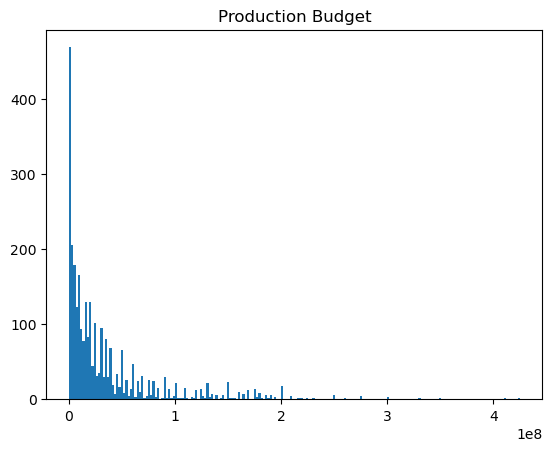

In [25]:
fig, ax = plt.subplots()
plt.hist(cleaned_df["production_budget"], bins=200)
ax.set_title("Production Budget");

We will produce the `stats` function for `production_budget`

In [26]:
stats('production_budget')

 Mean:34287085.19637252
 Median:17000000.0
 Std:47672750.903373405



We will produce a histogram for `averagerating`

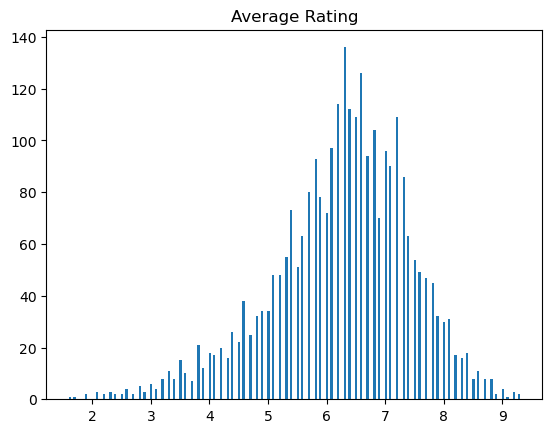

In [27]:
fig, ax = plt.subplots()
plt.hist(cleaned_df["averagerating"], bins=200)
ax.set_title("Average Rating");

We will produce the `stats` function for `averagerating`

In [28]:
stats('averagerating')

 Mean:6.249110568538549
 Median:6.4
 Std:1.1859530886691918



We will produce a histogram for `numvotes`

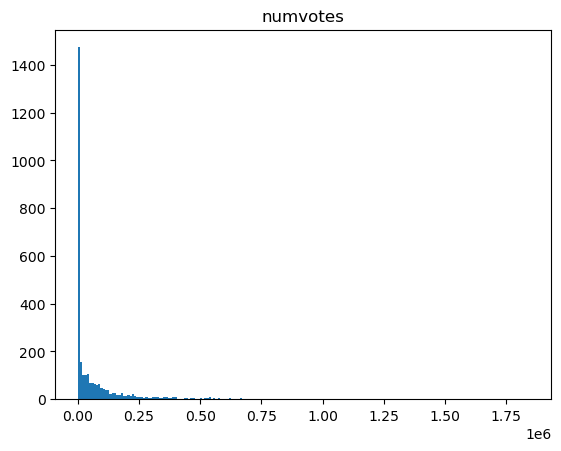

In [29]:
fig, ax = plt.subplots()
plt.hist(cleaned_df["numvotes"], bins=200)
ax.set_title("numvotes");

We will produce the `stats` function for `numvotes`

In [30]:
stats('numvotes')

 Mean:66465.27659574468
 Median:7999.0
 Std:134449.32806695305



We will produce a histogram for `domestic_gross`

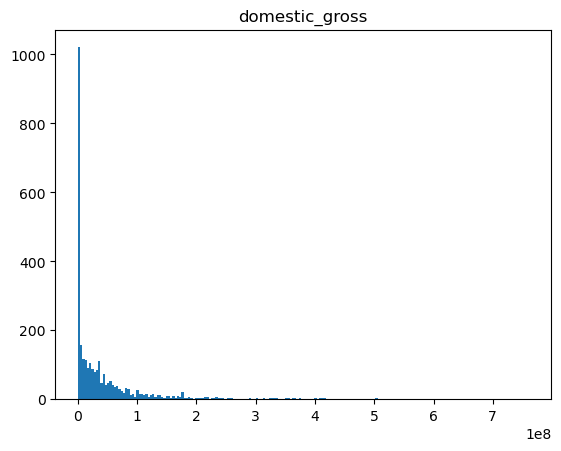

In [31]:
fig, ax = plt.subplots()
plt.hist(cleaned_df["domestic_gross"], bins=200)
ax.set_title("domestic_gross");

We will produce the `stats` function for `domestic_gross`

In [32]:
stats('domestic_gross')

 Mean:43015135.7603767
 Median:16376066.0
 Std:74609315.36676295



We will produce a histogram for `worldwide_gross`

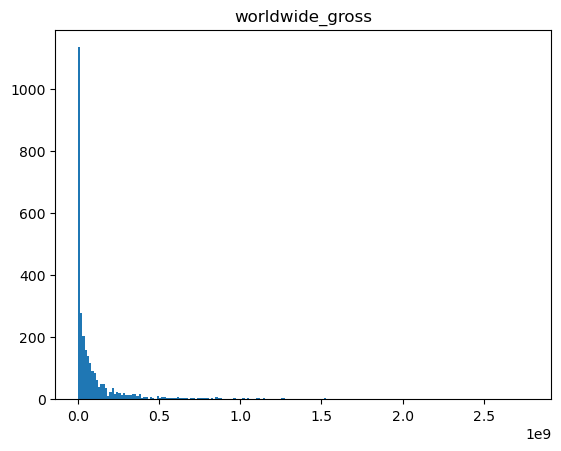

In [33]:
fig, ax = plt.subplots()
plt.hist(cleaned_df["worldwide_gross"], bins=200)
ax.set_title("worldwide_gross");

We will produce the `stats` function for `worldwide_gross`

In [34]:
stats('worldwide_gross')

 Mean:102880430.94000697
 Median:29960051.0
 Std:203929266.97751546



In [35]:
# compute the correlation matrix
corr_matrix = cleaned_df.corr()

# print the correlation matrix
corr_matrix

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross
averagerating,1.000000,0.312122,0.010443,0.129830,0.177276,0.165638
numvotes,0.312122,1.000000,-0.005912,0.502965,0.563362,0.560655
id,0.010443,-0.005912,1.000000,-0.045565,-0.005440,-0.020782
production_budget,0.129830,0.502965,-0.045565,1.000000,0.716270,0.778746
domestic_gross,0.177276,0.563362,-0.005440,0.716270,1.000000,0.946493
worldwide_gross,0.165638,0.560655,-0.020782,0.778746,0.946493,1.000000


In [37]:
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(cleaned_df["production_budget"], cleaned_df["worldwide_gross"])
print(corr_coef, p_value)

0.7787459767709454 0.0


In [151]:
cleaned_df.describe()

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross
count,2867.000000,2.867000e+03,2867.000000,2.867000e+03,2.867000e+03,2.867000e+03
mean,6.249111,6.646528e+04,50.967213,3.428709e+07,4.301514e+07,1.028804e+08
std,1.185953,1.344493e+05,28.680842,4.767275e+07,7.460932e+07,2.039293e+08
min,1.600000,5.000000e+00,1.000000,1.400000e+03,0.000000e+00,0.000000e+00
25%,5.600000,1.465000e+02,27.000000,5.000000e+06,4.963625e+05,2.259093e+06
50%,6.400000,7.999000e+03,51.000000,1.700000e+07,1.637607e+07,2.996005e+07
75%,7.100000,7.576750e+04,76.000000,4.000000e+07,5.178837e+07,1.012707e+08
max,9.300000,1.841066e+06,100.000000,4.250000e+08,7.605076e+08,2.776345e+09


In [38]:
cut_cleaned_df = cleaned_df[[ 'movie', 'genres', 'production_budget', 'worldwide_gross']]
cut_cleaned_df.head(3)

,movie,genres,production_budget,worldwide_gross
16,Foodfight!,"Action,Animation,Comedy",45000000,73706
36,On the Road,"Adventure,Drama,Romance",25000000,9313302
42,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",91000000,187861183


In [39]:
# split values by commas from column genres and explode the column
explode_cleaned_df = cut_cleaned_df.assign(by_genre=cut_cleaned_df['genres'].str.split(',')).explode('by_genre')
explode_cleaned_df

,movie,genres,production_budget,worldwide_gross,by_genre
16,Foodfight!,"Action,Animation,Comedy",45000000,73706,Action
16,Foodfight!,"Action,Animation,Comedy",45000000,73706,Animation
16,Foodfight!,"Action,Animation,Comedy",45000000,73706,Comedy
36,On the Road,"Adventure,Drama,Romance",25000000,9313302,Adventure
36,On the Road,"Adventure,Drama,Romance",25000000,9313302,Drama
...,...,...,...,...,...
73096,Sisters,"Action,Drama",30000000,106030660,Action
73096,Sisters,"Action,Drama",30000000,106030660,Drama
73111,Ali,Drama,109000000,87683966,Drama
73151,Columbus,Comedy,700000,1110511,Comedy


In [102]:
grouped = explode_cleaned_df.groupby('by_genre')['production_budget'].median().sort_values(ascending=False)
print(grouped)

by_genre
Adventure      80000000.0
Animation      75500000.0
Fantasy        43000000.0
Action         40000000.0
Sci-Fi         33500000.0
Family         25000000.0
Western        21500000.0
Crime          20000000.0
History        20000000.0
Comedy         20000000.0
Biography      20000000.0
Sport          15000000.0
Thriller       15000000.0
War            15000000.0
Drama          13000000.0
Romance        13000000.0
Musical        12500000.0
News           12000000.0
Music          11500000.0
Documentary    10000000.0
Mystery        10000000.0
Horror          7000000.0
Name: production_budget, dtype: float64


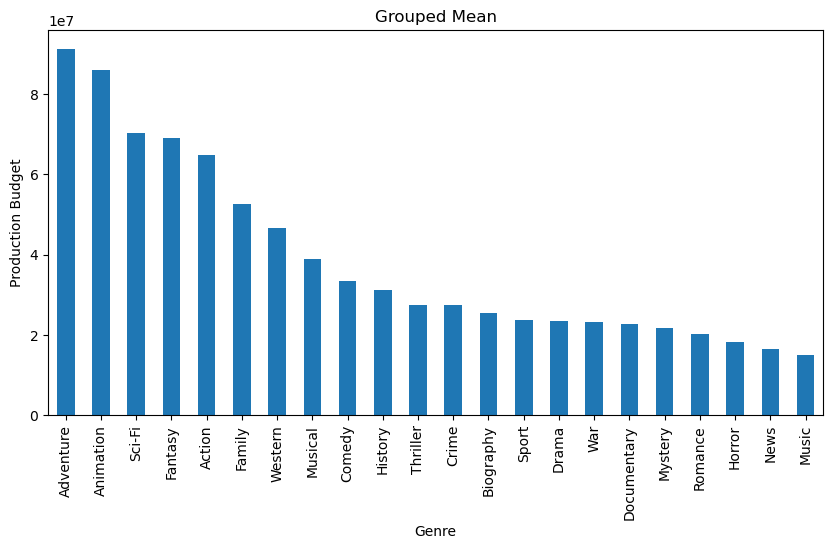

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# assume that you have an "explode_cleaned_df" DataFrame with columns 'by_genre' and 'production_budget'

# group the data by genre and calculate the median production budget for each group
grouped = explode_cleaned_df.groupby('by_genre')['production_budget'].mean().sort_values(ascending=False)

# create a bar graph based on the median value for each genre (sorted)
grouped.plot(kind='bar', figsize=(10, 5))
plt.title('Grouped Mean')
plt.ylabel('Production Budget')
plt.xlabel('Genre')
plt.xticks(rotation=90)

# display the plot
plt.show()


In [123]:
explode_cleaned_df[explode_cleaned_df['by_genre'] == 'Adventure'].describe()

,production_budget,worldwide_gross
count,4.480000e+02,4.480000e+02
mean,9.131197e+07,2.999950e+08
std,7.422907e+07,3.469365e+08
min,2.500000e+04,0.000000e+00
25%,2.775000e+07,4.154942e+07
50%,8.000000e+07,1.744875e+08
75%,1.500000e+08,4.330902e+08
max,4.106000e+08,2.208208e+09


In [113]:
adventure_budget

,movie,genres,production_budget,worldwide_gross,by_genre
36,On the Road,"Adventure,Drama,Romance",25000000,9313302,Adventure
42,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",91000000,187861183,Adventure
47,Jurassic World,"Action,Adventure,Sci-Fi",215000000,1648854864,Adventure
56,Tangled,"Adventure,Animation,Comedy",260000000,586477240,Adventure
58,John Carter,"Action,Adventure,Sci-Fi",275000000,282778100,Adventure
...,...,...,...,...,...
61897,Dark Phoenix,"Action,Adventure,Sci-Fi",350000000,149762350,Adventure
63119,The Kid Who Would Be King,"Action,Adventure,Family",59000000,28348446,Adventure
65994,"Paul, Apostle of Christ","Adventure,Biography,Drama",5000000,25529498,Adventure
68524,Dragon Ball Super: Broly,"Action,Adventure,Animation",8500000,122747755,Adventure


In [51]:
adventure_budget = explode_cleaned_df[explode_cleaned_df['by_genre'] == 'Adventure']

In [122]:
adventure_budget.head(3)

,movie,genres,production_budget,worldwide_gross,by_genre
36,On the Road,"Adventure,Drama,Romance",25000000,9313302,Adventure
42,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",91000000,187861183,Adventure
47,Jurassic World,"Action,Adventure,Sci-Fi",215000000,1648854864,Adventure


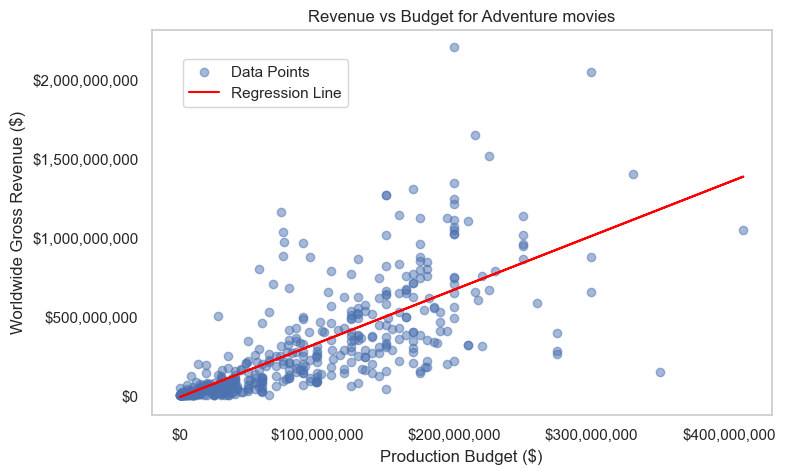

In [149]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fit linear regression model
model = LinearRegression().fit(adventure_budget[['production_budget']], adventure_budget['worldwide_gross'])

# Create scatter plot with regression line
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(adventure_budget['production_budget'], adventure_budget['worldwide_gross'], alpha=0.5)
ax.plot(adventure_budget['production_budget'], model.predict(adventure_budget[['production_budget']]), color='red')

# Set axis labels and title
ax.set_xlabel('Production Budget ($)')
ax.set_ylabel('Worldwide Gross Revenue ($)')
ax.set_title('Revenue vs Budget for Adventure movies')

# Add a legend
ax.legend(["Data Points", "Regression Line"], loc=(.05, .80))

# Add gridlines
ax.grid()

# Format tick labels
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))

# Save and show plot
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [150]:
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(adventure_budget["production_budget"], adventure_budget["worldwide_gross"])
print(corr_coef, p_value)

0.7286040544514536 2.5902156046902413e-75
